# IMDB Sentiment Classification with LSTM

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2. Load and Preprocess IMDB Dataset
- Load top 10,000 frequent words
- Pad sequences to fixed length

In [2]:
# Parameters
max_features = 10000  # vocabulary size
maxlen = 200          # sequence length
batch_size = 32

# Load data
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 200), Test shape: (25000, 200)


## 3. Build LSTM Model
- Embedding layer
- LSTM layer
- Dense output for binary classification

In [3]:
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Train the Model

In [4]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=3,  # minimal for demo
    validation_data=(x_test, y_test)
)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 230s 288ms/step - accuracy: 0.7171 - loss: 0.5420 - val_accuracy: 0.7652 - val_loss: 0.4833
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 268s 297ms/step - accuracy: 0.8554 - loss: 0.3495 - val_accuracy: 0.8474 - val_loss: 0.3676
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 232s 297ms/step - accuracy: 0.8812 - loss: 0.2959 - val_accuracy: 0.8624 - val_loss: 0.3449


## 5. Plot Accuracy

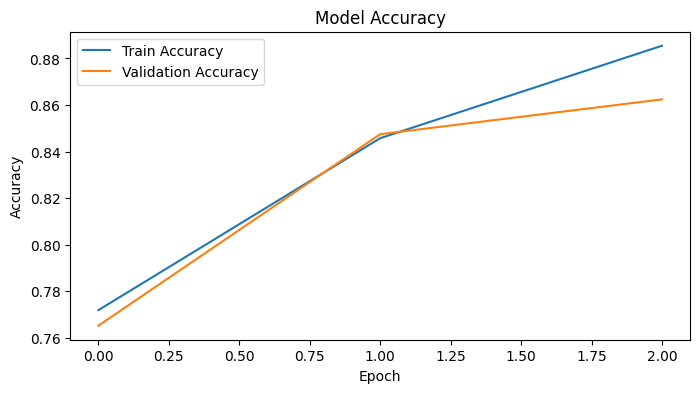

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6. Visualize Example Predictions

In [7]:
# Get word index
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Predict on first 5 test samples
predictions = (model.predict(x_test[:5]) > 0.5).astype(int).flatten()
labels = ['Negative', 'Positive']

print("Example Predictions:\n")
for i in range(5):
    review = decode_review(x_test[i])
    print(f"Review {i+1}:")
    print(f"   Text: {review}")
    print(f"   True: {labels[y_test[i]]}, Predicted: {labels[predictions[i]]}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Example Predictions:

Review 1:
   Text: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
   True: Negative, Predicted: Negative

Review 2:
   Text: psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by san